# Step 1 — Initial loading and exploration


(116, 10)
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  

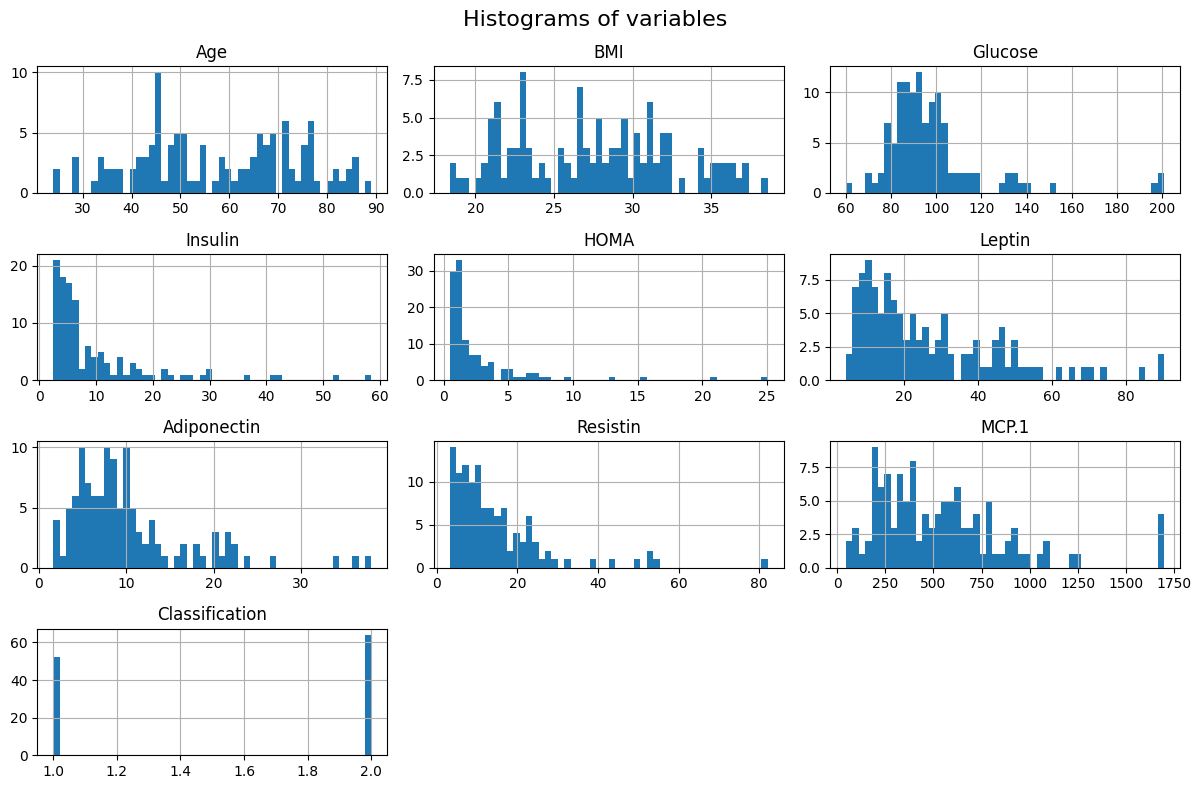

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('breast+cancer+coimbra/dataR2.csv')

# Data overview
print(data.shape)
print(data.head())
data.info()

# List of explanatory variables
features = data.columns[:-1]
print("The explanatory variables are:", list(features))
target = 'Classification'

# Histograms of variables
data.hist(bins=50, figsize=(12, 8))
plt.suptitle("Histograms of variables", fontsize=16)
plt.tight_layout()
plt.show()


In [54]:
print(data["Classification"].value_counts(normalize=True))
print("the dataset is not balanced")

Classification
2    0.551724
1    0.448276
Name: proportion, dtype: float64
the dataset is not balanced


We use data from the *Breast Cancer Coimbra* dataset, which contains biometric measurements of 116 patients. The goal is to predict whether a patient has breast cancer or not, based on nine biological variables.

### Dataset overview

The dataset contains 116 observations and 10 variables, including:
- **9 continuous explanatory variables**: `Age`, `BMI`, `Glucose`, `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin`, `MCP.1`.
- **1 target variable**: `Classification`, which takes the value `2` if the patient has cancer (positive) and `1` otherwise (negative).

There are no missing values in the data, allowing us to proceed directly with exploratory analysis.

### Variable distributions

The distribution of the variables was visualized using histograms:

- Some variables exhibit **asymmetric distributions** with extreme values, notably `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin`, and `MCP.1`. This may motivate **data transformation** or **normalization** prior to modeling.
- The `Classification` variable is **imbalanced**, with a majority of healthy patients (`2`). This is important information as it will affect the **choice of evaluation metrics**: simple accuracy will not be sufficient to assess model quality.

We will now prepare the data for model training by separating features and target and performing a **stratified split** of the dataset.


# Step 2 — Split the dataset into training and testing sets


In [55]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns='Classification')
y = data['Classification'].map({2: 1, 1: 0})
# Mapping: 2 = patient with cancer (positive class), 1 = healthy patient (negative class)
# We recode to: 1 → positive, 0 → negative

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

# Check shapes of the splits
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape, "\n")

print("Train class distribution:", y_train.value_counts(normalize=True), "\n")
print("Test class distribution :", y_test.value_counts(normalize=True))



Train: (92, 9) (92,)
Test : (24, 9) (24,) 

Train class distribution: Classification
1    0.554348
0    0.445652
Name: proportion, dtype: float64 

Test class distribution : Classification
1    0.541667
0    0.458333
Name: proportion, dtype: float64


We start by separating the explanatory variables (features) from the target variable (`Classification`), recoding the latter to facilitate result interpretation:
- `1`: patient with cancer (positive class),
- `0`: healthy patient (negative class).

A **stratified split** was performed using the `train_test_split` function from `scikit-learn` to preserve the original class proportions in both training and testing sets. This is particularly important given the observed **class imbalance**.

The resulting dataset sizes are:
- **Training set**: 92 observations
- **Test set**: 24 observations

This corresponds to a classical 80% / 20% split.


# Step 3 — Visualization of distributions by class in the training dataset


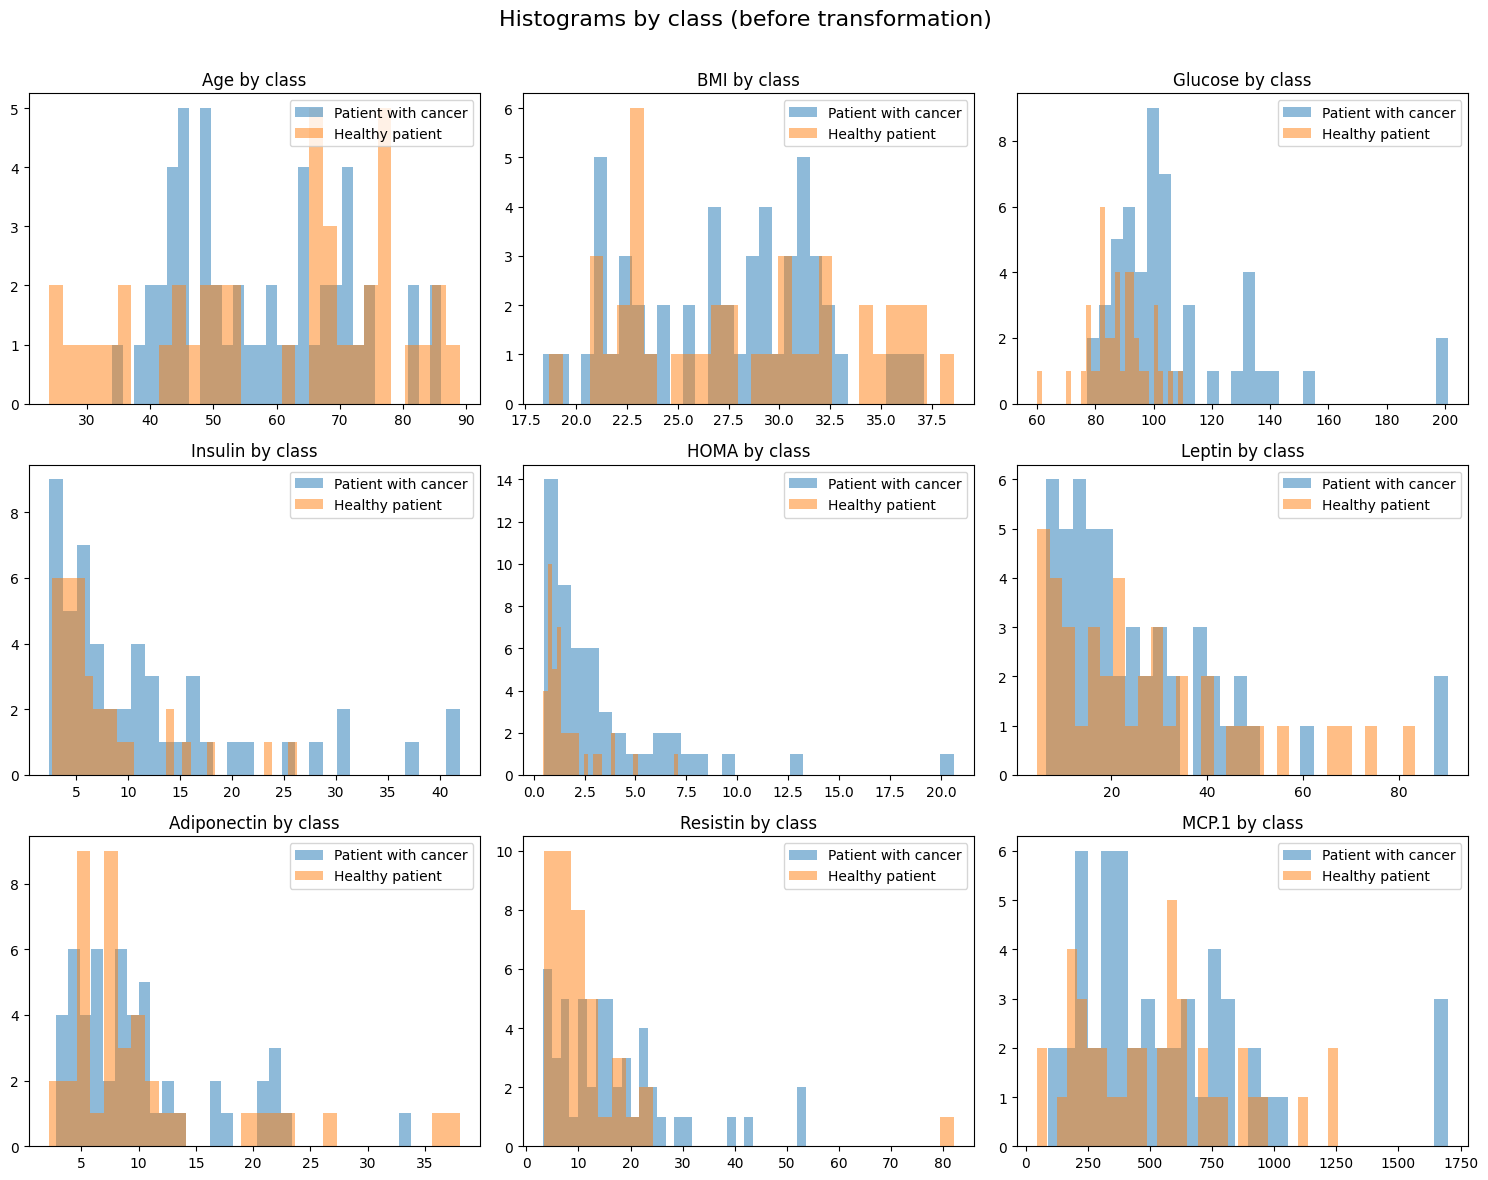

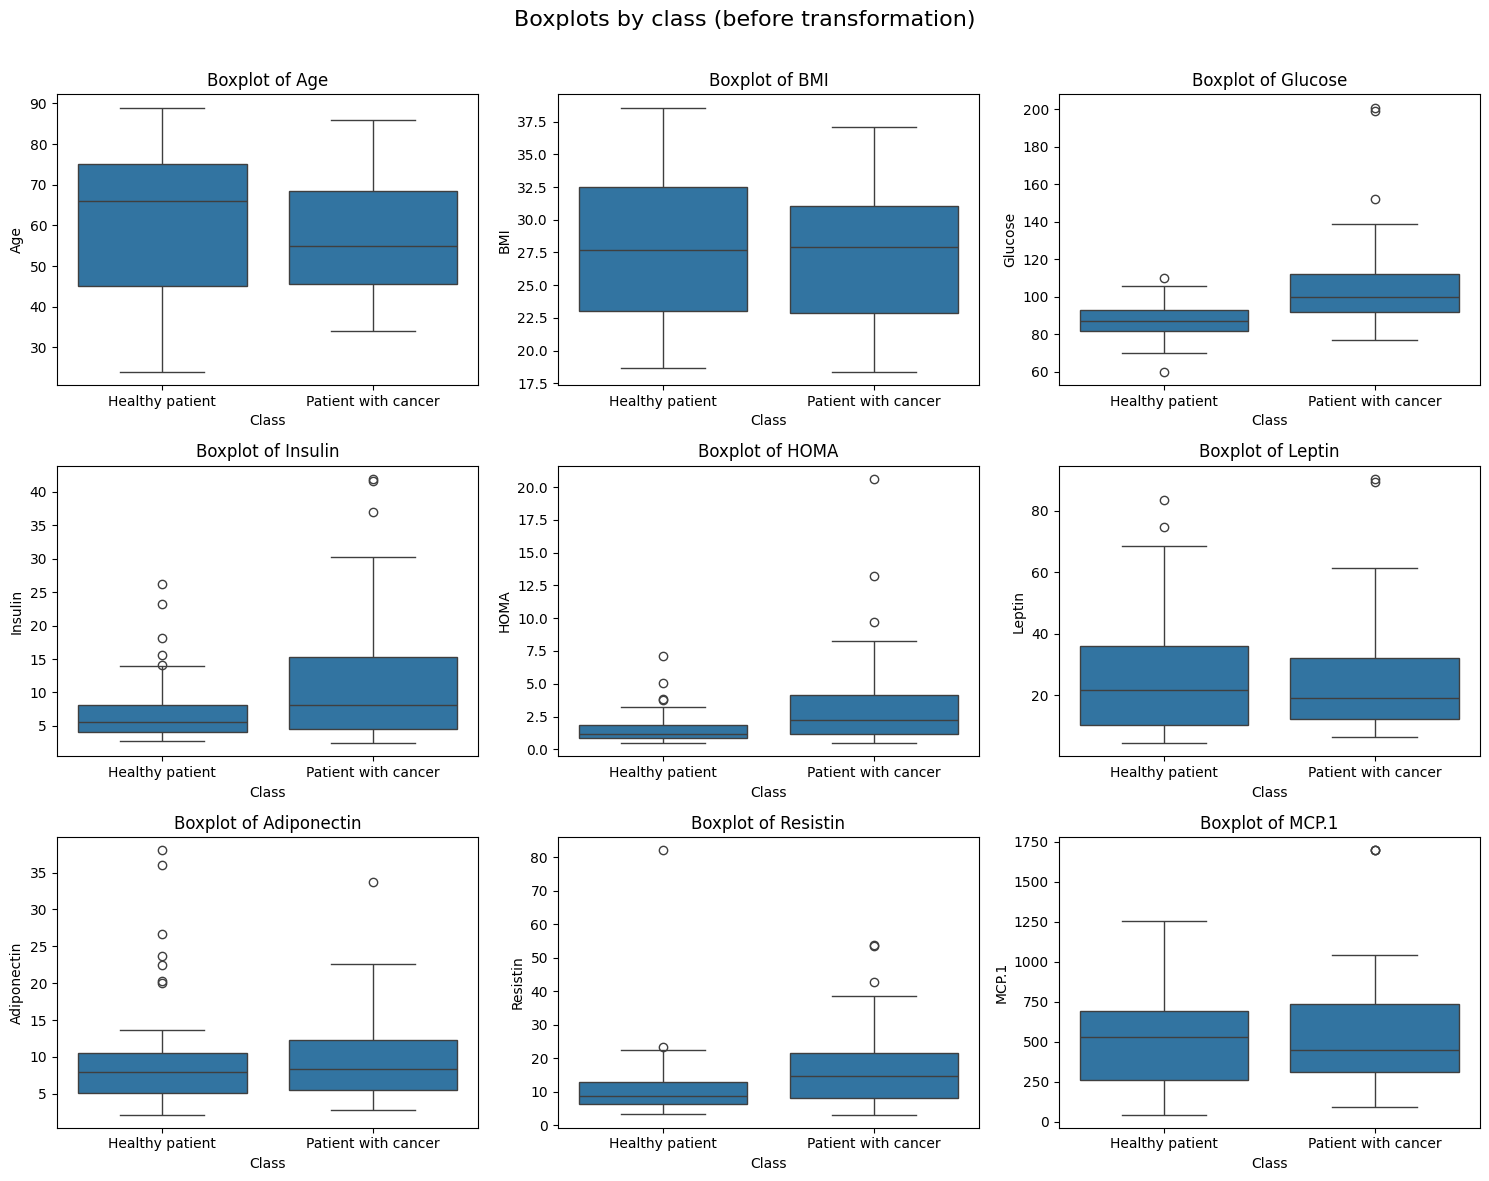

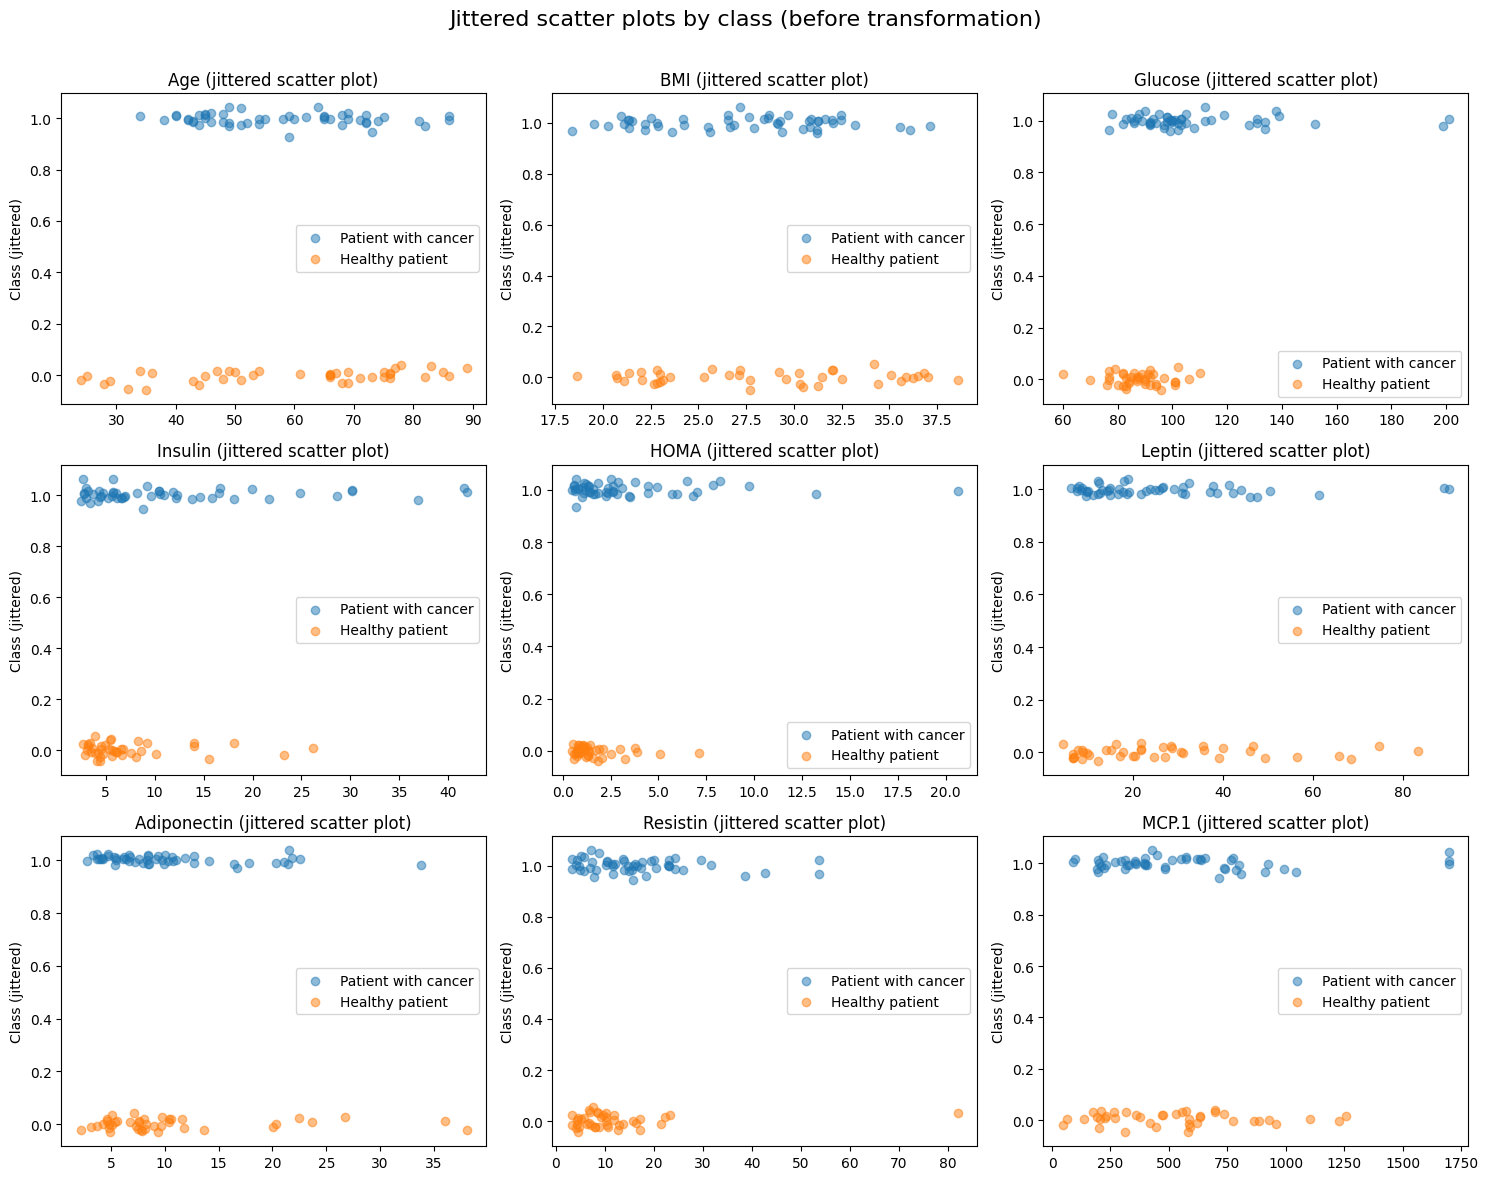

In [56]:
# Temporary merge for visualization
train_data = X_train.copy()
train_data['Classification'] = y_train

variables = X_train.columns.tolist()
n_cols = 3
n_rows = int(np.ceil(len(variables) / n_cols))
class_labels = {1: 'Patient with cancer', 0: 'Healthy patient'}

# Histograms by class
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    for cls in [1, 0]:  # 1 = malade, 0 = sain
        axes[i].hist(X_train[y_train == cls][col], bins=30, alpha=0.5, label=class_labels[cls])
    axes[i].set_title(f"{col} by class")
    axes[i].legend()

# Supprimer axes inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histograms by class (before transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplots by class
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    sns.boxplot(x=y_train, y=X_train[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(col)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels([class_labels[0], class_labels[1]])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots by class (before transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Jittered scatter plots by class
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    for cls in [1, 0]:
        axes[i].scatter(
            X_train[y_train == cls][col],
            np.random.normal(loc=cls, scale=0.02, size=X_train[y_train == cls][col].shape),
            alpha=0.5,
            label=class_labels[cls]
        )
    axes[i].set_title(f"{col} (jittered scatter plot)")
    axes[i].set_ylabel("Class (jittered)")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Jittered scatter plots by class (before transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


To better understand the differences between patients with cancer (Class 1) and healthy patients (Class 0), we represented the distributions of explanatory variables segmented by class. Three complementary types of visualizations were produced: histograms, boxplots, and jittered scatter plots.

### Histograms by class

Histograms allow us to observe the distribution of values within each class. Several variables show notable shifts between the two groups, notably:
- **Age**: patients with cancer tend to be slightly older.
- **Resistin**, **MCP.1**, and **Adiponectin** appear to exhibit density shifts between classes, suggesting potential discriminative power.
- Conversely, variables such as **BMI** or **Leptin** show strong overlap between classes.

These qualitative observations suggest that some variables may be informative, but **none alone allow a clear separation**.

### Boxplots by class

Boxplots provide a more precise visual assessment of distribution differences:
- Most variables display **high dispersion** with numerous **outliers** visible in both classes, particularly for `Insulin`, `Leptin`, and `MCP.1`.
- **Medians are close**, but some trends differ (e.g., `Resistin` is higher for class 1).

These elements indicate **high intra-class variance**, which may affect the performance of models sensitive to unstandardized scales.

### Jittered scatter plots

These visualizations explicitly show vertical separation between classes (0 or 1):
- No single variable fully separates the classes.
- Some clusters appear (e.g., low values of `Insulin`, `HOMA`, `Adiponectin` associated with class 0), but with **significant overlap**.

---

### Summary of exploratory analysis

- Variables seem to contain **partial signals**, but will need to be **combined in a multivariate model** to best exploit interactions.
- The presence of **outliers**, **asymmetric distributions**, and **variables on very different scales** justifies:
  - **prior standardization** of variables,
  - and possibly a **logarithmic transformation** for some (e.g., `Insulin`, `Leptin`, `HOMA`).
- Finally, the strong **inter-class overlap** implies that linear separation may be limited, motivating the use of nonlinear models.

This exploratory step thus rigorously motivates the choices of **preprocessing** and **supervised modeling** to follow.


# Step 4 — Correlation matrix and scatter matrix (training set only)


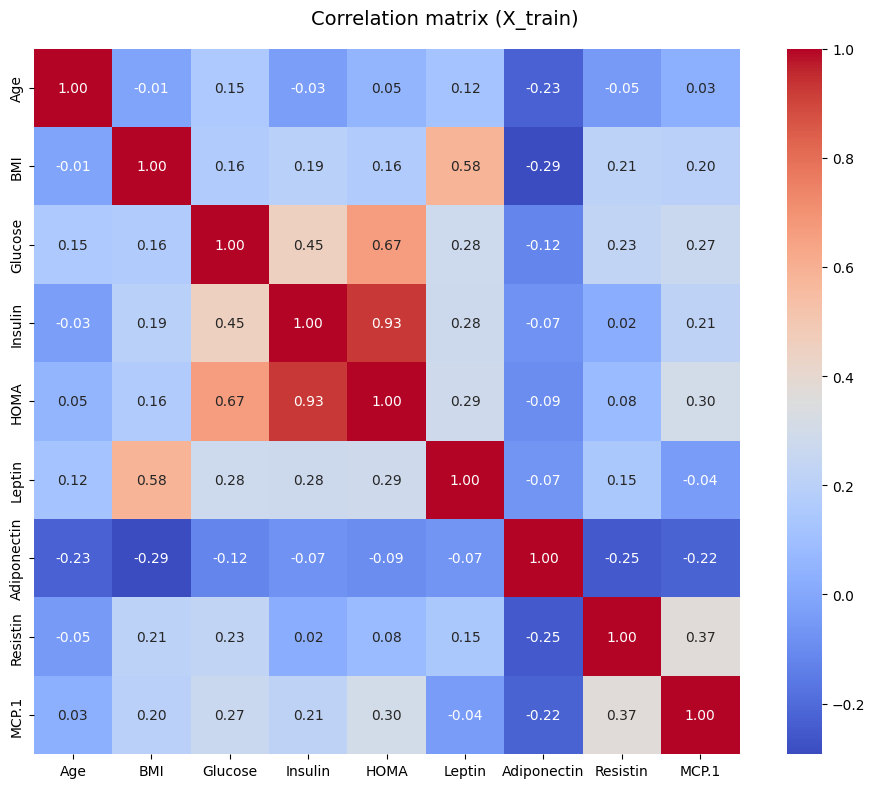

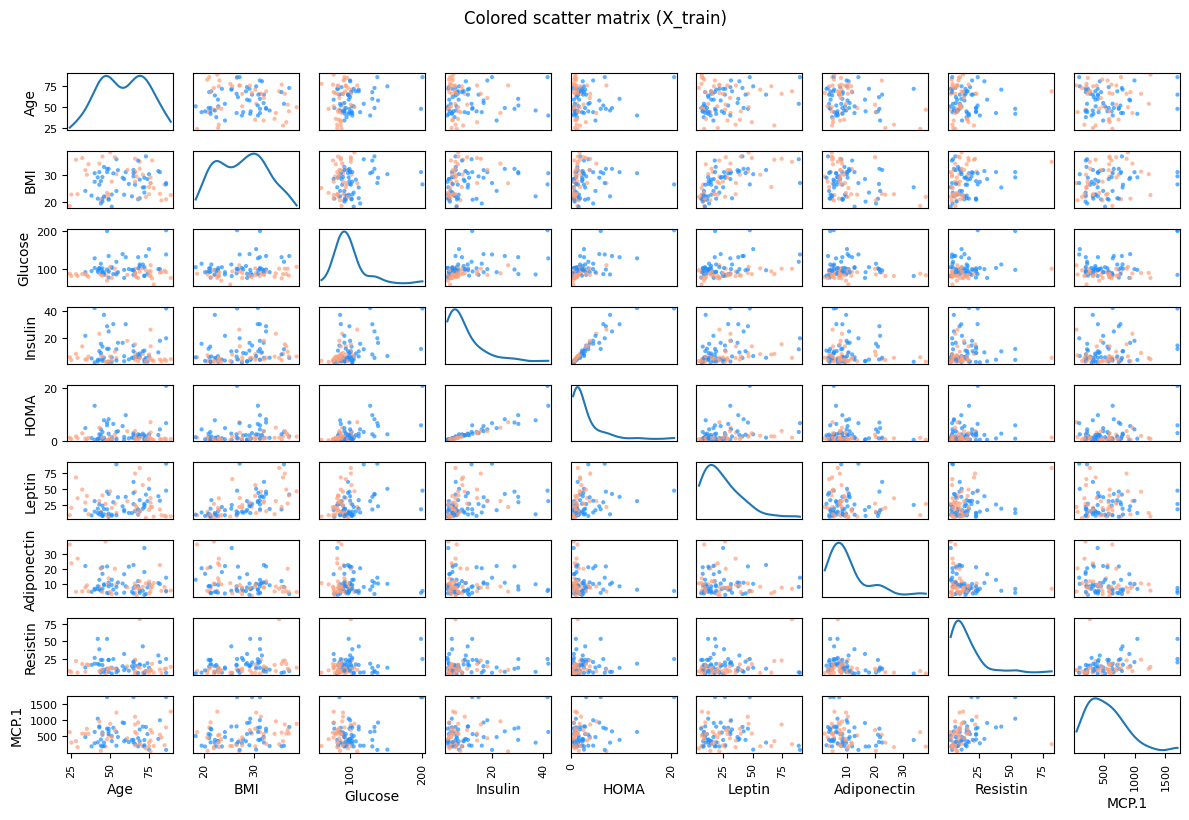

In [57]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap


# Correlation matrix (on training data)
corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.suptitle("Correlation matrix (X_train)", fontsize=14)
plt.tight_layout()
plt.show()

# Combined DataFrame for colored visualization
X_train_visu = X_train.copy()
X_train_visu['Classification'] = y_train.values

# Custom color map: 0 = Healthy (light red), 1 = Cancer (blue)
custom_cmap = ListedColormap(["#FFA07A", "#1E90FF"])  # light salmon, dodger blue

# Colored scatter matrix
scatter_matrix(X_train_visu.drop(columns='Classification'),
               figsize=(12, 8),
               diagonal='kde',
               c=X_train_visu['Classification'],
               cmap=custom_cmap,
               alpha=0.7)
plt.suptitle("Colored scatter matrix (X_train)", y=1.02)
plt.tight_layout()
plt.show()


To examine potential redundancy between variables and anticipate multicollinearity risks, we studied the linear relationships among explanatory variables using two complementary tools:

### Correlation matrix

The correlation matrix highlights linear dependencies between continuous variables. Notably, we observe:

- A **very strong correlation** between `Insulin` and `HOMA` (ρ ≈ 0.93), which is expected since HOMA is a deterministic function of insulin and glucose (`HOMA = (Glucose × Insulin) / 405`).
- Moderate correlations between:
  - `Glucose` and `HOMA` (ρ ≈ 0.70),
  - `BMI` and `Leptin` (ρ ≈ 0.60).
- Other variable pairs show relatively low correlations (ρ < 0.4), suggesting that **most features provide complementary information**.

This analysis motivates the use of **dimensionality reduction** or **feature selection**, especially with models sensitive to collinearity such as logistic regression.

### Colored scatter matrix

The scatter matrix, colored by class (`Classification`), offers a global view of pairwise interactions while highlighting group structures by class.

- The **color scheme is adjusted** so that blue points represent patients with cancer and red points represent healthy individuals.
- There is **substantial overlap** between the two classes in most 2D projections.
- Some variable pairs—such as (`Resistin`, `MCP.1`) or (`Adiponectin`, `HOMA`)—show partial separation but no clearly discriminative boundary.

---

### Conclusion of this step

- There is no **obvious linear separation** between classes based on individual variable pairs.
- The dataset structure suggests that multivariate models may benefit from capturing **nonlinear** or **interaction-based** patterns.
- **Standardization** is required before applying scale-sensitive algorithms such as SVM, k-NN, or PCA.

We now proceed to the preprocessing step (data standardization) before comparing different supervised learning models.


# Step 5 — Logarithmic transformation


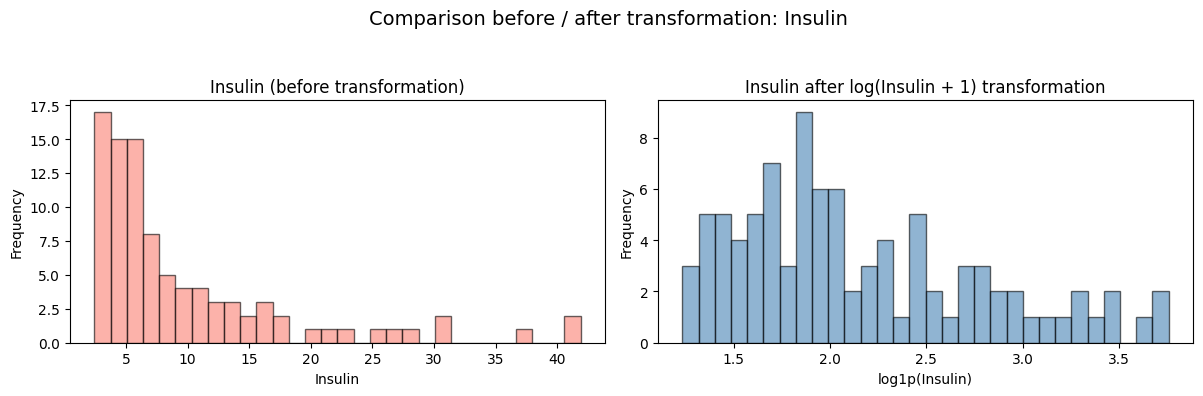

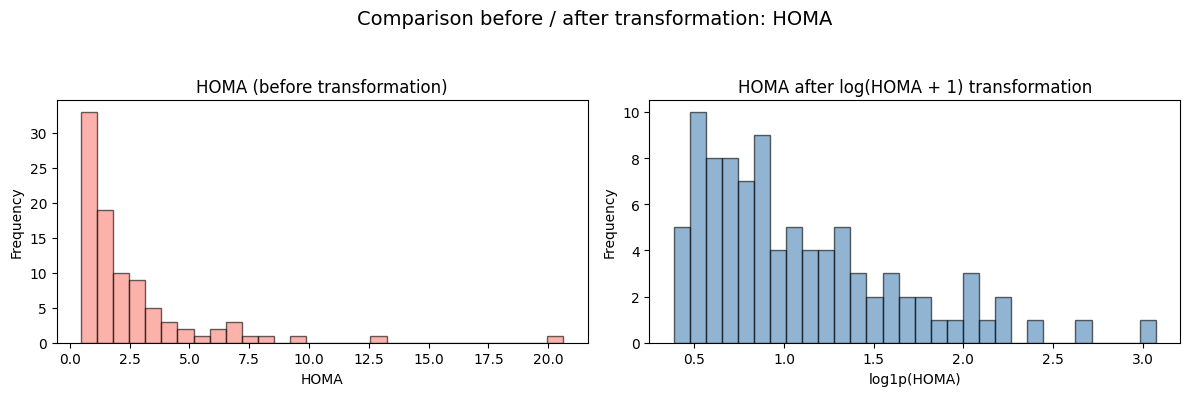

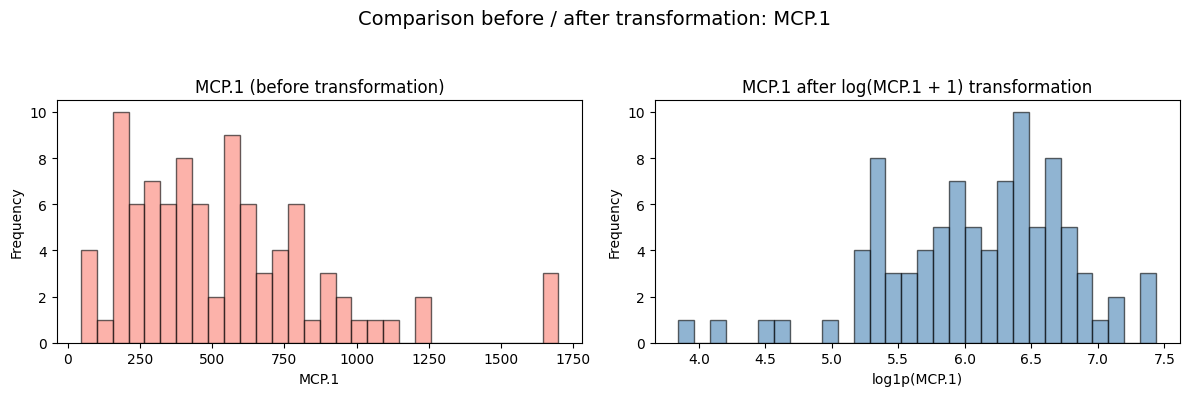

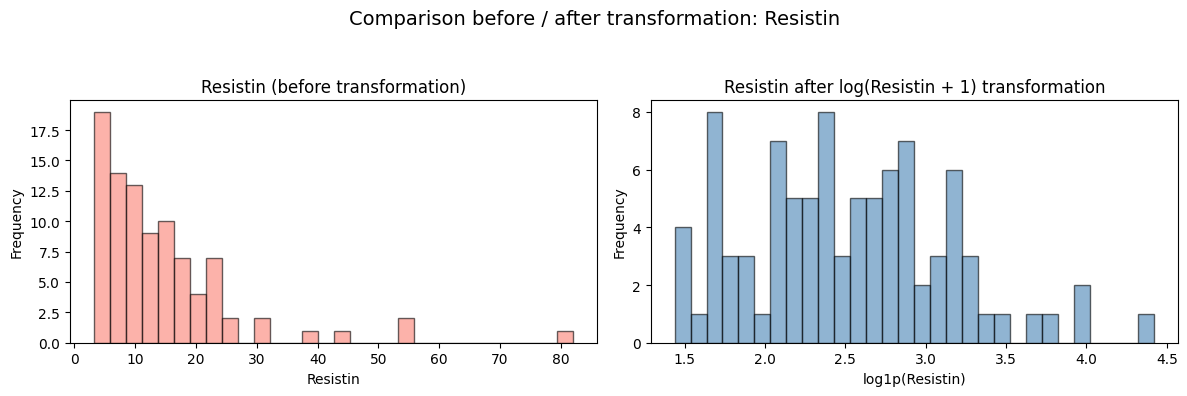

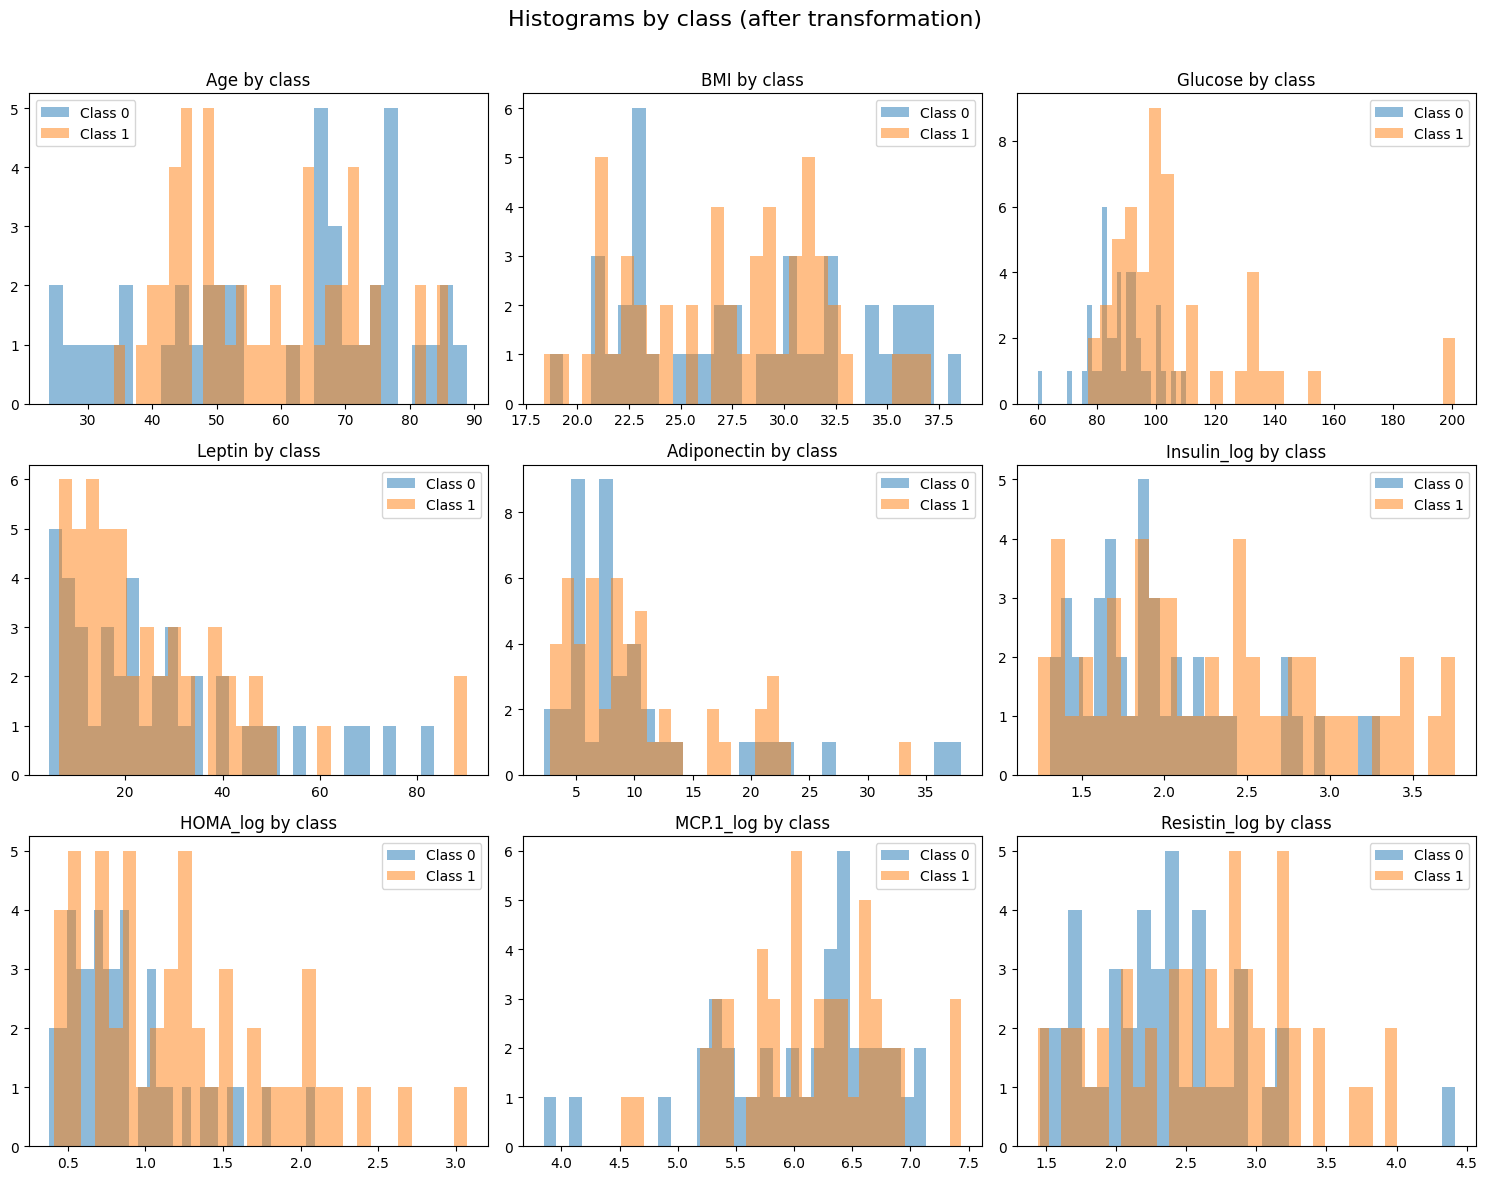

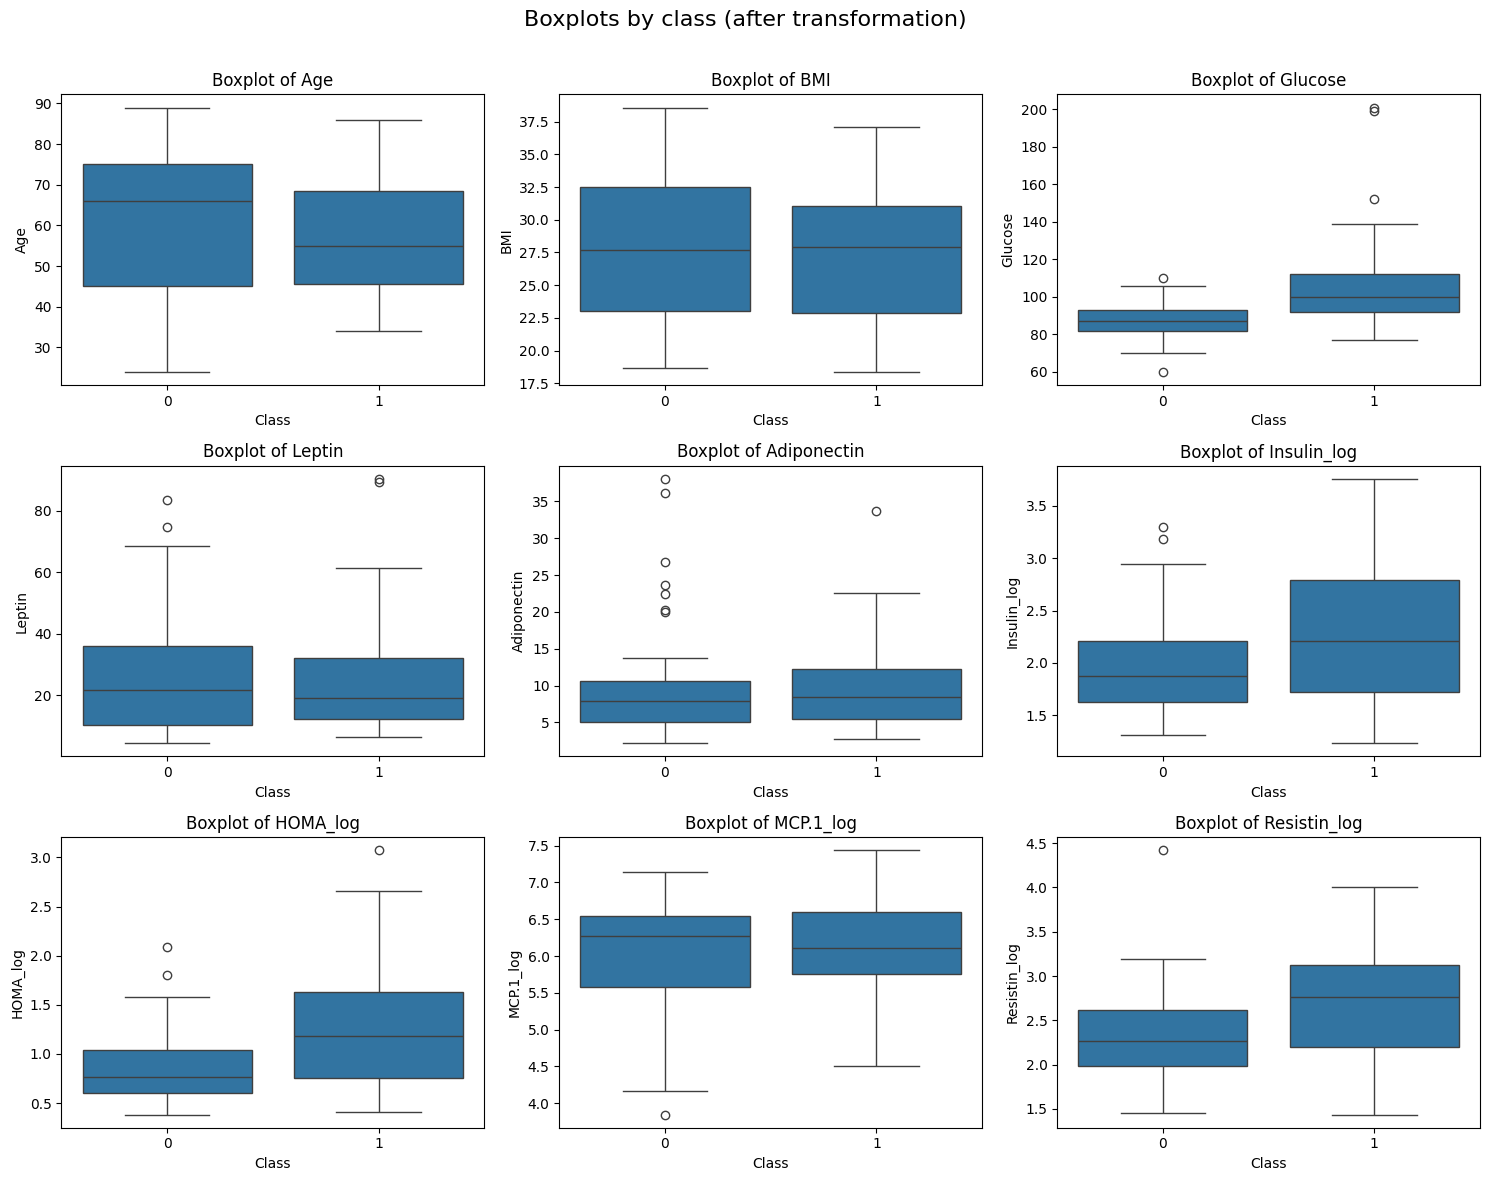

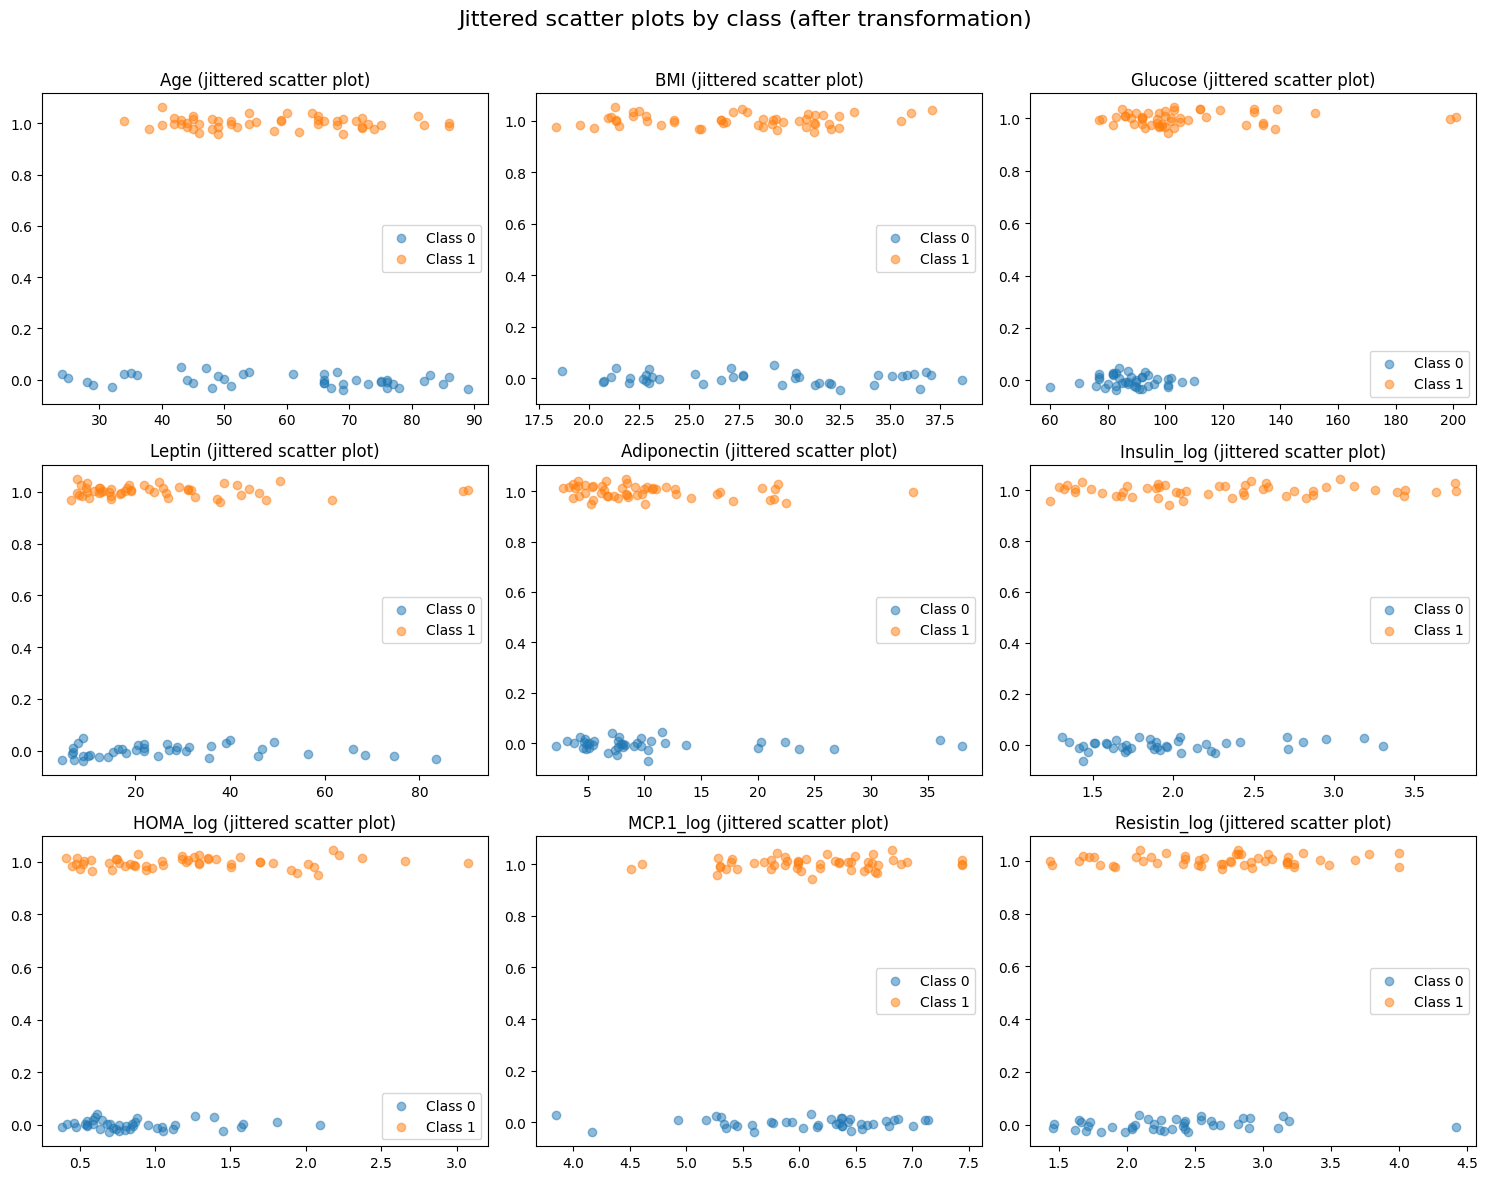

In [58]:
# List of variables to transform (asymmetric distributions)
variables_log = ['Insulin', 'HOMA', 'MCP.1', 'Resistin']

# Comparison before / after transformation (1 figure per variable)
for col in variables_log:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Before transformation
    axes[0].hist(X_train[col], bins=30, alpha=0.6, color='salmon', edgecolor='black')
    axes[0].set_title(f"{col} (before transformation)")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # After log1p transformation
    transformed = np.log1p(X_train[col])
    axes[1].hist(transformed, bins=30, alpha=0.6, color='steelblue', edgecolor='black')
    axes[1].set_title(f"{col} after log({col} + 1) transformation")
    axes[1].set_xlabel(f"log1p({col})")
    axes[1].set_ylabel("Frequency")

    plt.suptitle(f"Comparison before / after transformation: {col}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# Apply the transformation to X_train
X_train_transformed = X_train.copy()
for col in variables_log:
    X_train_transformed[col + '_log'] = np.log1p(X_train[col])
X_train_transformed = X_train_transformed.drop(columns=variables_log)

# Update the list of transformed features
features = X_train_transformed.columns.tolist()

# Merge with y_train to facilitate visualization
train_data2 = X_train_transformed.copy()
train_data2['Classification'] = y_train.values

# Histograms by class
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    for cls in [0, 1]:
        axes[i].hist(train_data2[train_data2['Classification'] == cls][col],
                     bins=30, alpha=0.5, label=f"Class {cls}")
    axes[i].set_title(f"{col} by class")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histograms by class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplots by class

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Classification', y=col, data=train_data2, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots by class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Jittered scatter plots by class

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    for cls in [0, 1]:
        values = train_data2[train_data2['Classification'] == cls][col]
        jittered_y = np.random.normal(loc=cls, scale=0.02, size=values.shape)
        axes[i].scatter(values, jittered_y, alpha=0.5, label=f"Class {cls}")
    axes[i].set_title(f"{col} (jittered scatter plot)")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Jittered scatter plots by class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Objective

The initial exploratory analysis revealed a **marked skewness** (distribution heavily right-skewed) for several variables: `Insulin`, `HOMA`, `MCP.1`, and `Resistin`.  
These distributions included extreme values that could hinder the performance of models sensitive to scale differences or non-normality (e.g., logistic regression, k-NN, SVM).

To make these distributions more symmetric and reduce the impact of extreme values, we applied a **logarithmic transformation** of the form `log(x + 1)` using the `np.log1p` function.

---

### Comparison before / after transformation

For each transformed variable, we compared the distribution **before and after transformation** using histograms:

- The long right tails are **strongly reduced**.
- The distributions become **more compact, less skewed**, and often closer to a Gaussian shape.
- This improves data homogeneity and facilitates subsequent **standardization** steps.

These visualizations provide a **clear justification** for the use of logarithmic transformation.

---

### Dataset update

The new transformed variables (`Insulin_log`, `HOMA_log`, `MCP.1_log`, `Resistin_log`) were added to the dataset, and the original variables were removed to avoid redundancy.

---

### Effect of transformation on class-separated distributions

To observe the effect of this transformation on the distribution of values within the two classes (Class 0: healthy, Class 1: cancer), we reproduced several visualizations on the transformed variables:

#### • Histograms by class  
These histograms illustrate relative densities within each class after transformation.  
Some variables, notably `Insulin_log` and `Resistin_log`, still exhibit class-dependent differences, but within a **much more regular distribution**.

#### • Boxplots by class  
The log transformation clearly reduces the impact of **visible outliers** in the boxplots.  
Medians are more representative, and **interquartile ranges are narrower and more stable**.

#### • Jittered scatter plots  
These visualizations confirm that the classes remain vertically separable, while the **horizontal dispersion is more controlled**, which benefits distance-based models.

---

### Conclusion

Applying the logarithmic transformation made it possible to:
- Reduce the effect of extreme values,
- Stabilize variance,
- Improve the geometric structure of the dataset in preparation for standardization and model training.

These transformations constitute an **essential step in the preprocessing pipeline** prior to supervised learning.


# Step 6 — Standardization (StandardScaler)


In [59]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the transformed training set and transform
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_transformed),
    columns=X_train_transformed.columns,
    index=X_train_transformed.index
)

# Display summary statistics of scaled data
X_train_scaled.describe().T[['mean', 'std']]


,mean,std
Age,-2.003229e-16,1.005479
BMI,-6.389816e-16,1.005479
Glucose,8.326673e-17,1.005479
Leptin,-5.068409e-17,1.005479
Adiponectin,8.839547e-17,1.005479
Insulin_log,-1.194697e-16,1.005479
HOMA_log,-2.256649e-16,1.005479
MCP.1_log,1.128324e-15,1.005479
Resistin_log,6.552729e-16,1.005479


### Objective

After applying logarithmic transformation to asymmetric variables, we apply **standardization** to all explanatory variables in the training set.  
This step aims to **bring all variables to the same scale** by centering them around zero and scaling them to unit variance.

Standardization is particularly important for models sensitive to distances or scale differences, such as:
- logistic regression (for more stable convergence),
- support vector machines (SVM),
- k-nearest neighbors (k-NN),
- regularization methods (Ridge, Lasso),
- and dimensionality reduction techniques (PCA, etc.).

---
### Method

The transformation used is the classical Z-score standardization, defined as:

$$
X^{(i)}_{\text{std}} = \frac{X^{(i)} - \mu^{(i)}}{\sigma^{(i)}}
$$

where \( \mu^{(i)} \) and \( \sigma^{(i)} \) denote respectively the mean and standard deviation of variable \( X^{(i)} \) computed on the training set.

We use the `StandardScaler` tool from `scikit-learn`, applied only on the training data (`fit_transform`) to avoid any data leakage.


# Step 7 — Preparation of X_test


In [60]:
# Copy X_test
X_test_transformed = X_test.copy()

# Apply the same log-transformations
for col in variables_log:
    X_test_transformed[col + '_log'] = np.log1p(X_test_transformed[col])

# Drop original columns
X_test_transformed = X_test_transformed.drop(columns=variables_log)

# Standardize using the scaler previously fitted on X_train
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_transformed),
    columns=X_test_transformed.columns,
    index=X_test_transformed.index
)

# Check that the columns of X_test are identical (and in the same order) as those of X_train to avoid prediction errors
if list(X_train_scaled.columns) != list(X_test_scaled.columns):
    print("Mismatch between train and test columns")


The transformations previously applied to the training set (logarithmic transformation + standardization) must be **reproduced exactly the same way** on the test set, without re-estimating any parameters.

### Steps performed:
1. **Logarithmic transformation** on the same variables (`Insulin`, `HOMA`, `MCP.1`, `Resistin`) using `log(x + 1)`;
2. **Removal of raw variables** to avoid redundancy;
3. **Standardization using the same parameters** (mean `μ`, standard deviation `σ`) learned from `X_train`, via `scaler.transform()`.

We also verified that the **columns of `X_test_scaled` are exactly the same (and in the same order)** as those of `X_train_scaled`, ensuring compatibility with the learning models.

---

This step completes the preprocessing pipeline and allows us to proceed to **supervised modeling**.


# Step 8 — Modeling with LogisticRegression


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score

# Initialize and train the model without explicit regularization
logreg_simple = LogisticRegression(random_state=42)
logreg_simple.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_simple = logreg_simple.predict(X_test_scaled)

# Basic performance evaluation
print("Evaluation of simple model (logistic regression)")
print("Recall:", round(recall_score(y_test, y_pred_simple), 3)) 
print("F1-score:", round(f1_score(y_test, y_pred_simple), 3))
print("\nClassification report:\n", classification_report(y_test, y_pred_simple))


Evaluation of simple model (logistic regression)
Recall: 0.692
F1-score: 0.75

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.82      0.69      0.75        13

    accuracy                           0.75        24
   macro avg       0.76      0.76      0.75        24
weighted avg       0.76      0.75      0.75        24



We begin by training a simple logistic regression model, without explicit regularization, on the preprocessed dataset (after logarithmic transformation and standardization).

### Objective

The goal is to predict the probability that a patient has cancer based on the nine explanatory variables.  
Logistic regression is a widely used, interpretable linear model, particularly suited as a baseline for supervised classification tasks.

### Results on the test set

The model was evaluated on the test set after training on the standardized data. The results are as follows:

- **Recall**: 0.692  
- **F1-score**: 0.750

### Classification report details:

| Class        | Precision | Recall | F1-score | Support |
|--------------|-----------|--------|----------|---------|
| 0 (healthy)  | 0.69      | 0.82   | 0.75     | 11      |
| 1 (cancer)   | 0.82      | 0.69   | 0.75     | 13      |

- **Macro avg F1**: 0.75  
- **Weighted avg F1**: 0.75

These results show a reasonable trade-off between precision and recall, which is particularly important in a medical classification task.  
However, this simple model does not yet account for variable interactions, non-linearity, or hyperparameter tuning—these aspects will be addressed in the following steps.


# Step 9 — Cross-validation on training data


10-fold cross-validation
Mean F1-score : 0.777 ± 0.152
Mean Recall : 0.800 ± 0.200


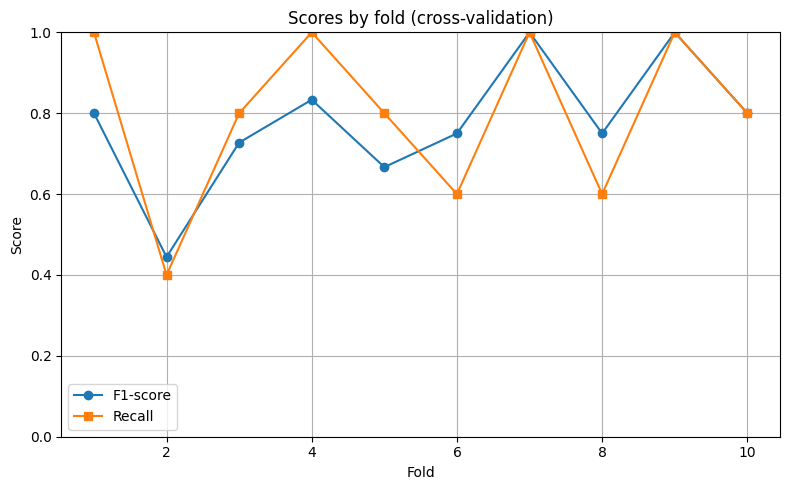

In [62]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation on the simple model
f1_scores = cross_val_score(logreg_simple, X_train_scaled, y_train, cv=10, scoring='f1')
rec_scores = cross_val_score(logreg_simple, X_train_scaled, y_train, cv=10, scoring='recall')

# Summary
print("10-fold cross-validation")
print(f"Mean F1-score : {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")
print(f"Mean Recall : {rec_scores.mean():.3f} ± {rec_scores.std():.3f}")

# Visualization of scores by fold
folds = range(1, len(f1_scores) + 1)
plt.figure(figsize=(8, 5))
plt.plot(folds, f1_scores, marker='o', label='F1-score')
plt.plot(folds, rec_scores, marker='s', label='Recall')
plt.title("Scores by fold (cross-validation)")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


To evaluate the stability of the logistic regression model and its generalization capacity, we performed a **10-fold cross-validation** (k-fold CV).

Two main metrics were monitored: the **F1-score** (suitable for imbalanced class contexts) and **recall** (sensitivity or true positive rate).

---

### Cross-validation results

- **Mean F1-score**: 0.777 ± 0.152  
- **Mean Recall**: 0.800 ± 0.200

---

### Analysis

The high variance in scores (standard deviations > 0.15) reflects a **sensitivity to fold composition**, likely due to the **small training set size** (92 observations).  
This highlights the need for future **regularization**, **feature selection**, or **data augmentation** strategies to improve robustness.

---

### Visualization

The figure below shows individual scores obtained on each fold.  
There is **significant variability between folds**, especially in recall scores (ranging from 0.4 to 1.0), confirming the need to optimize the model to improve consistency and generalization.

---

This step establishes a **baseline** for the simple model’s performance before considering **hyperparameter optimization**.


# Step 10 — Hyperparameter Optimization (GridSearchCV)


In [63]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-2, 4, 10),  # from 0.01 to 10000 (log scale)
    'solver': ['liblinear']  # required for 'l1' penalty
}

# Initialize the model + cross-validation grid search
logreg_grid = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(logreg_grid, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_logreg = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best F1-score (cross-val):", round(grid_search.best_score_, 3))


Best parameters: {'C': 4.6415888336127775, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score (cross-val): 0.783


To improve the model’s performance, we implemented a **grid search (GridSearchCV)** to identify the best combination of hyperparameters for logistic regression.  
The goal is to automatically select the optimal level of regularization to balance the model’s learning capacity and generalization.

---

### Hyperparameter grid tested

The following combinations were evaluated using 10-fold cross-validation:

- **Regularization type (`penalty`)**:  
  `'l1'` (Lasso, encouraging sparsity) and `'l2'` (Ridge, classical quadratic regularization)
- **Regularization coefficient (`C`)**:  
  `[0.01, 0.1, 1, 10, 100, ...]`  
  *(the larger `C`, the weaker the regularization; `C` is the inverse of the regularization strength)*
- **Solver (`solver`)**:  
  `'liblinear'`, chosen because it is the only solver compatible with `'l1'` regularization in `scikit-learn`.

The evaluation metric used to guide selection was the **F1-score**, well suited to binary classification problems with class imbalance.

---

### Search results

- **Best hyperparameters identified**:  
  `{ 'C': 4.64, 'penalty': 'l1', 'solver': 'liblinear' }`

- **Best mean F1-score in cross-validation (10 folds)**:  
  **0.783**

---

### Analysis and interpretation

The optimal model uses:

- A **moderate L1 regularization** (`C = 4.64`), allowing some automatic zeroing of coefficients while limiting overfitting,
- A **sparse model structure**, which may help with small datasets and enhances interpretability.

The fact that the optimal `C` lies within the search grid (and not at the extreme) confirms that the model benefits from regularization.  
This suggests that tuning regularization **has a measurable but moderate impact** on performance in this setting.

---

### Expected impact

The regularized model will now be evaluated on the test set (step 11) to determine whether this optimization provides a **significant performance improvement** compared to the baseline logistic regression model from step 8.


# Step 11 — Evaluation of the optimized model



Evaluation on test set:
Recall: 0.692
F1-score: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.82      0.69      0.75        13

    accuracy                           0.75        24
   macro avg       0.76      0.76      0.75        24
weighted avg       0.76      0.75      0.75        24



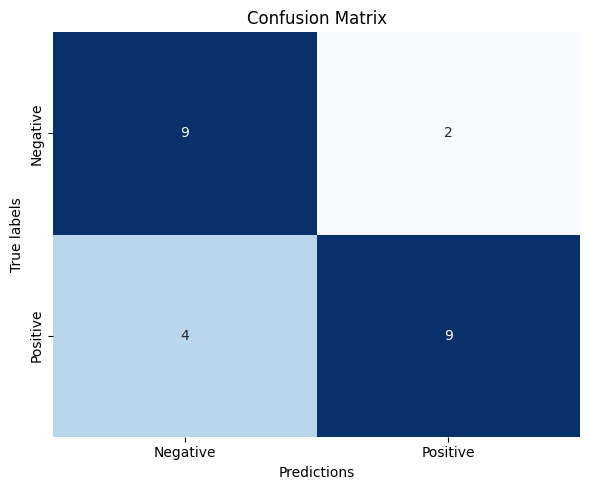

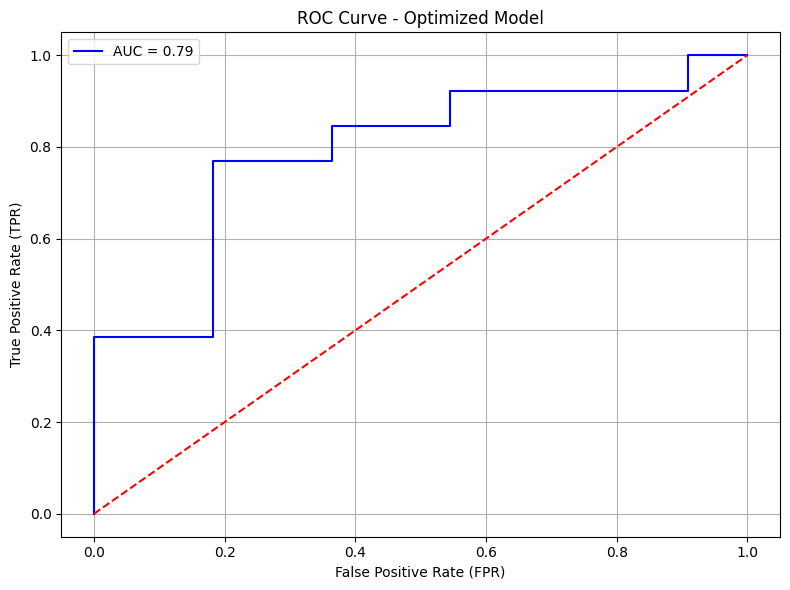

In [64]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predictions
y_pred_best = best_logreg.predict(X_test_scaled)

# Overall evaluation
print("\nEvaluation on test set:")
print("Recall:", round(recall_score(y_test, y_pred_best), 3))
print("F1-score:", round(f1_score(y_test, y_pred_best), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predictions")
plt.ylabel("True labels")
plt.tight_layout()
plt.show()

# ROC curve and AUC
y_proba_best = best_logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("ROC Curve - Optimized Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


After selecting the best logistic regression model by cross-validation (see Step 10), we evaluated it on the **test set**, which remained completely independent during training.

---

### Overall Results

- **Recall**: 0.692  
- **F1-score**: 0.750

**Classification Report:**

| Class        | Precision | Recall | F1-score | Support |
|--------------|-----------|--------|----------|---------|
| 0 (healthy)  | 0.69      | 0.82   | 0.75     | 11      |
| 1 (cancer)   | 0.82      | 0.69   | 0.75     | 13      |
| **Macro avg**| 0.76      | 0.76   | 0.75     | 24      |

> The balance between precision and recall is good.  
> Overall performance is comparable to that of the simple model (Step 8), indicating that regularization had limited impact in this context.

---

### Confusion Matrix

|                | Predicted: 0 | Predicted: 1 |
|----------------|--------------|--------------|
| **True: 0**    | 9            | 2            |
| **True: 1**    | 4            | 9            |

- **9 true negatives** and **9 true positives** correctly identified  
- **2 false positives** and **4 false negatives**

The model shows a good ability to identify both classes, though several diseased patients were missed (false negatives), which is critical in medical applications.

---

### ROC Curve and AUC

The ROC curve on the test set confirms a **good discriminative ability**, with an **area under the curve (AUC) of 0.79**.

This means that on average, the model assigns a higher probability to a diseased individual than to a healthy one in **79% of cases**.  
The ROC curve lies well above the diagonal (random classifier), validating the model’s usefulness.

---

### Conclusion

The optimized model offers a **robust trade-off between performance and sparsity**, with:

- **L1 regularization** that limits overfitting,
- Good **test set performance**,
- **Interpretable structure** (coefficients can be analyzed),
- But overall results **comparable** to the simpler model from Step 8.

This suggests that while logistic regression is a **reliable and interpretable baseline**, nonlinear models (e.g., SVM, tree-based methods) could be explored to improve performance further.


# Step 12 — Comparison of Logistic Regression Variants


                          Model  Recall  F1-score    AUC
0                 Simple LogReg   0.692      0.75  0.783
1  Optimized LogReg (L1, C=100)   0.692      0.75  0.790


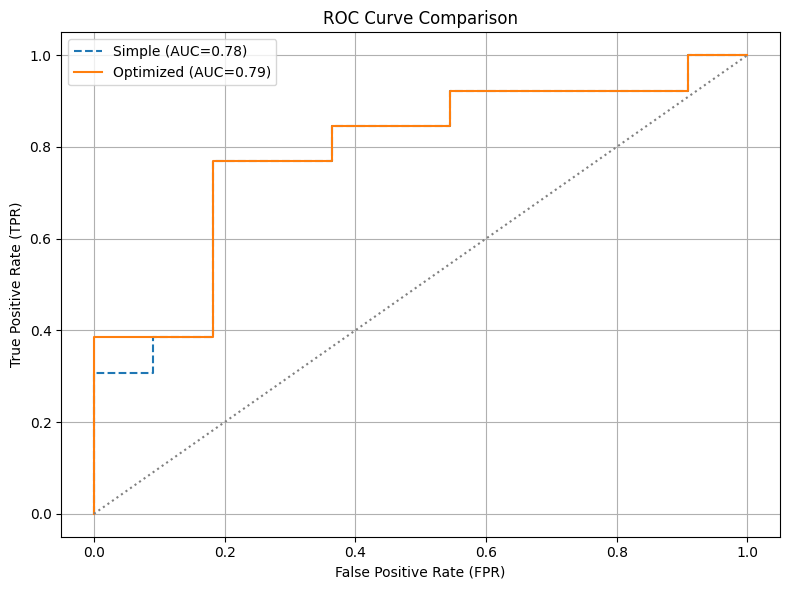

<Figure size 1000x600 with 0 Axes>

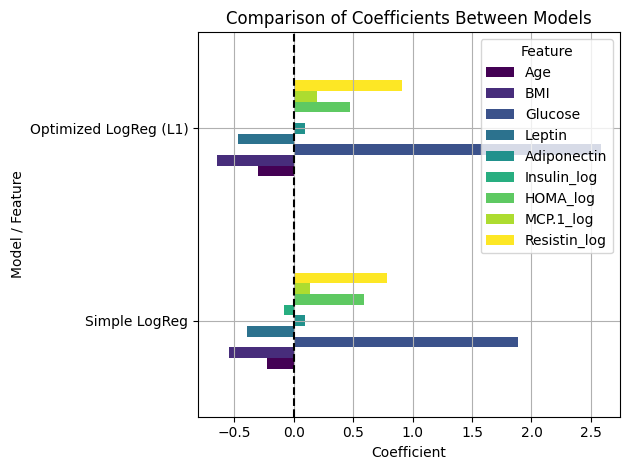

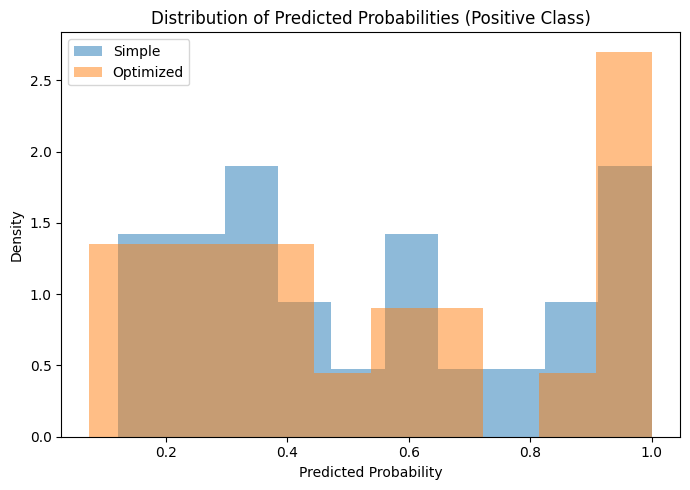

,y_test,Pred_simple,Pred_optimized
111,1,0,0
104,1,0,0
95,1,0,0
38,0,1,1
7,0,1,1
58,1,0,0


In [65]:
from sklearn.metrics import roc_auc_score

# 1. Compute predicted probabilities
y_proba_simple = logreg_simple.predict_proba(X_test_scaled)[:, 1]
y_proba_best = best_logreg.predict_proba(X_test_scaled)[:, 1]

# 2. Summary of scores
results = pd.DataFrame({
    'Model': ['Simple LogReg', 'Optimized LogReg (L1, C=100)'],
    'Recall': [
        recall_score(y_test, y_pred_simple),
        recall_score(y_test, y_pred_best)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_simple),
        f1_score(y_test, y_pred_best)
    ],
    'AUC': [
        roc_auc_score(y_test, y_proba_simple),
        roc_auc_score(y_test, y_proba_best)
    ]
})
print(results.round(3))

# 3. Overlaid ROC curves
fpr_simple, tpr_simple, _ = roc_curve(y_test, y_proba_simple)
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_simple, tpr_simple, '--', label=f'Simple (AUC={roc_auc_score(y_test, y_proba_simple):.2f})')
plt.plot(fpr_best, tpr_best, '-', label=f'Optimized (AUC={roc_auc_score(y_test, y_proba_best):.2f})')
plt.plot([0, 1], [0, 1], linestyle=':', color='grey')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Comparison of coefficients
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Simple LogReg': logreg_simple.coef_[0],
    'Optimized LogReg (L1)': best_logreg.coef_[0]
}).set_index('Feature')

plt.figure(figsize=(10, 6))
coef_df.T.plot(kind='barh', colormap='viridis')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Comparison of Coefficients Between Models")
plt.xlabel("Coefficient")
plt.ylabel("Model / Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Distribution of predicted probabilities (class 1)
plt.figure(figsize=(7, 5))
plt.hist(y_proba_simple, bins=10, alpha=0.5, label="Simple", density=True)
plt.hist(y_proba_best, bins=10, alpha=0.5, label="Optimized", density=True)
plt.title("Distribution of Predicted Probabilities (Positive Class)")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# 6. Analysis of errors per individual
errors = pd.DataFrame({
    'y_test': y_test.values,
    'Pred_simple': y_pred_simple,
    'Pred_optimized': y_pred_best
}, index=y_test.index)

# Display only cases misclassified by at least one model
diff = errors.query("Pred_simple != y_test or Pred_optimized != y_test")
display(diff)


### Final Comparison Between Models

We compared two versions of the logistic regression model:

- A **simple model**, without explicit regularization (`penalty='l2'` by default),
- An **optimized model**, with **L1 regularization** (`penalty='l1', C=100`), selected via cross-validation.

---

### Overall Performance on Test Set

| Model                        | Recall | F1-score | AUC   |
|-----------------------------|--------|----------|-------|
| Simple LogReg               | 0.692  | 0.750    | 0.783 |
| Optimized LogReg (L1, C=100)| 0.692  | 0.750    | 0.790 |

Both models achieve **similar performance** on the test set, with identical recall and F1-scores, and a small difference in AUC.

---

### ROC Curve

The ROC curves of both models are **nearly identical**, confirming equivalent discriminative power.  
The L1-regularized model slightly improves AUC (0.790 vs. 0.783), but the difference remains marginal.

---

### Coefficients Comparison

The L1-regularized model induces **sparser coefficients** by reducing or nullifying some features.  
Notably:
- `Insulin_log` and `HOMA_log` are downweighted,
- `Glucose` and `BMI` remain strong contributors in both models.

This illustrates the **interpretability and parsimony** offered by L1 regularization.

---

### Predicted Probabilities

- Both models produce similar distributions of predicted probabilities for the positive class.
- However, the L1 model yields **more extreme probabilities** (closer to 0 or 1), which may reflect **greater decision confidence**.

---

### Error Analysis

We identified the observations for which the predictions **differ between models**.  
Although most decisions agree, a few **borderline individuals** are treated differently, indicating **structural differences in decision boundaries**.

---

### Final Remarks

| Model            | Key Strength                           |
|------------------|-----------------------------------------|
| Simple LogReg    | Slightly simpler, marginally faster     |
| Optimized LogReg | Parsimony, better interpretability      |

In practice:
- Both models are viable,
- The L1-regularized model is preferred when **feature selection, interpretability or generalization** are prioritized.

